In [1]:
from sir_model import SIR_Network_Model, State
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline


In [21]:
sir_model = SIR_Network_Model()

cmap = {State.infected: 'r', State.susceptible: 'g', State.resistant:'k'}
pos = nx.spring_layout(sir_model.network.graph)

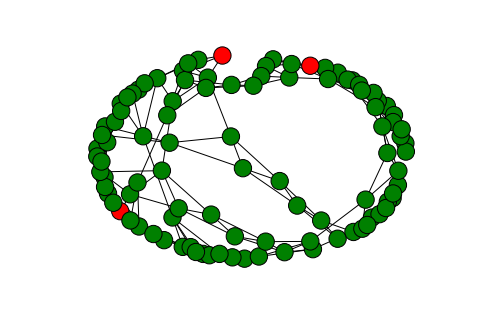

In [17]:
pos = nx.spring_layout(sir_model.network.graph)
colors = list(map(lambda x: cmap[x.state], sir_model.network.graph.nodes()))
nx.draw(sir_model.network.graph,pos,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))


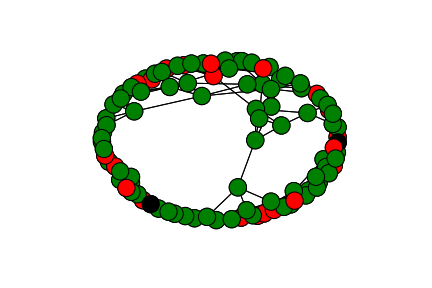
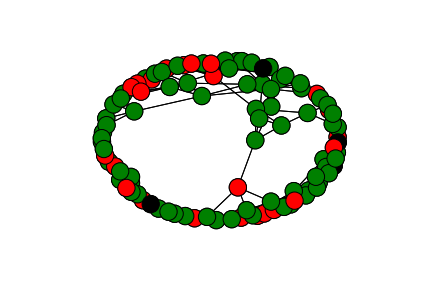
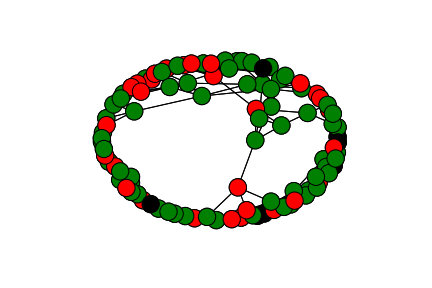
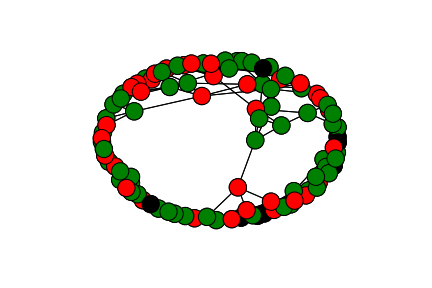
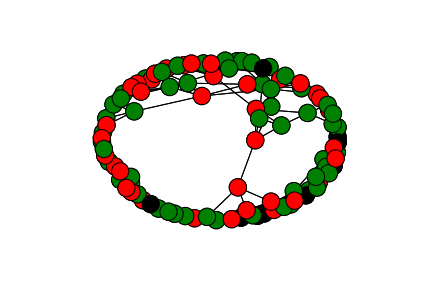
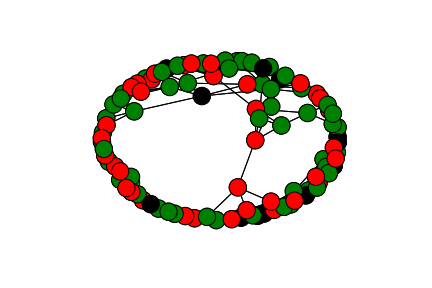
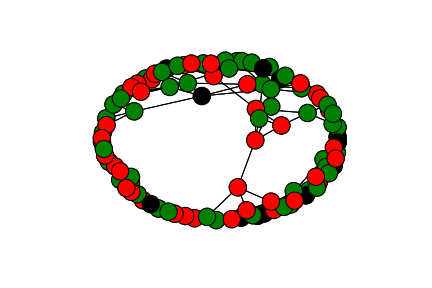
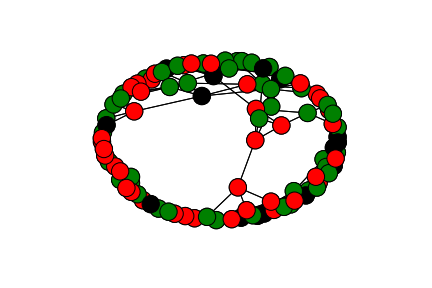
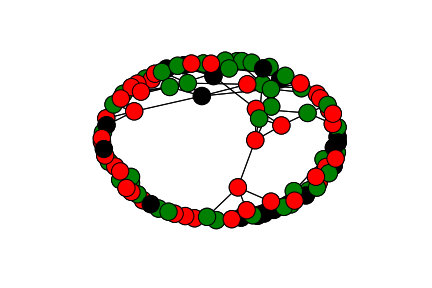
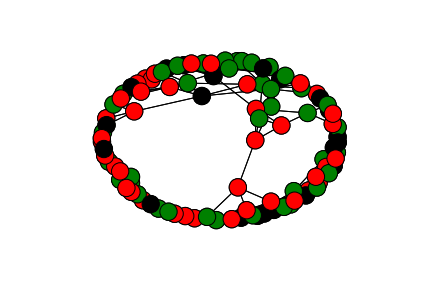
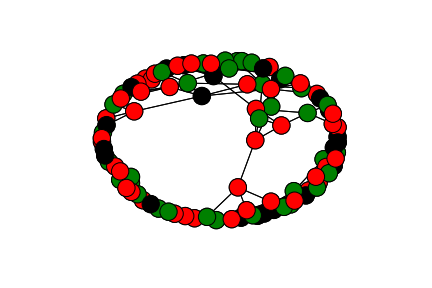
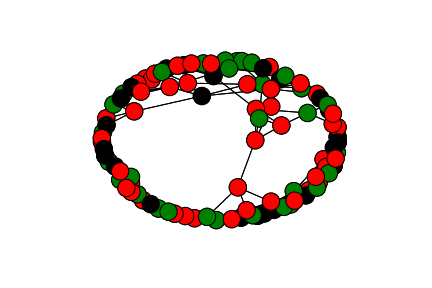
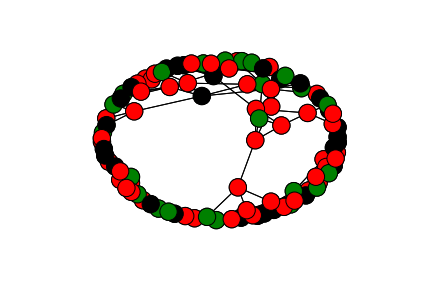
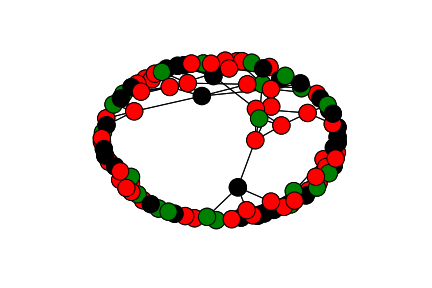
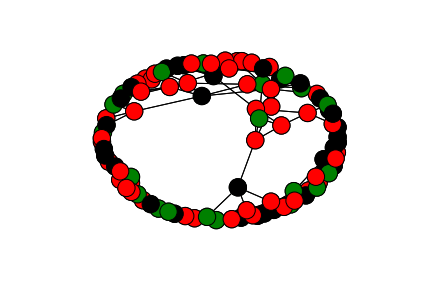
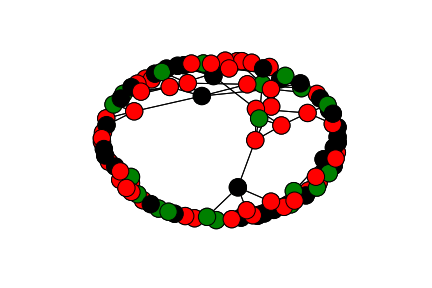
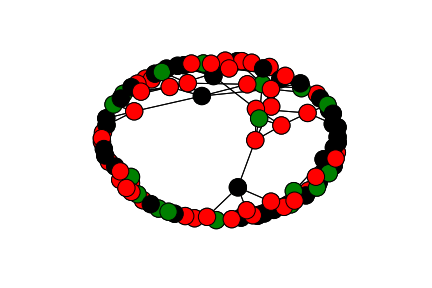
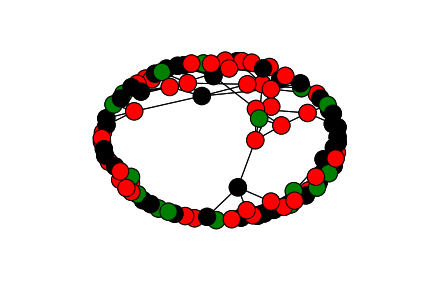
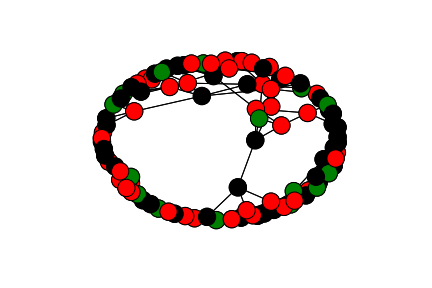
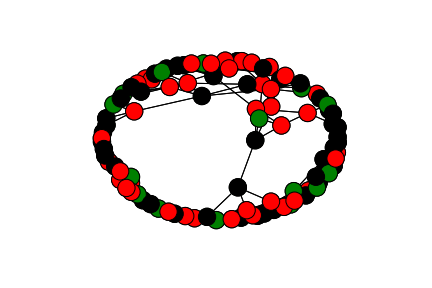
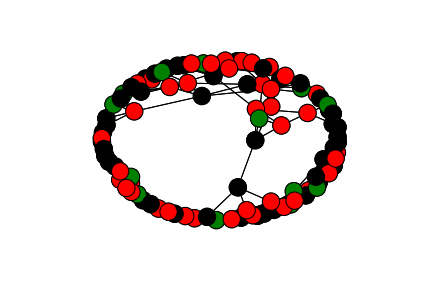
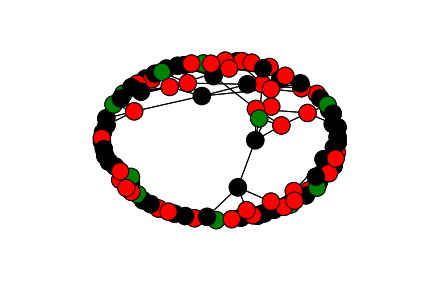
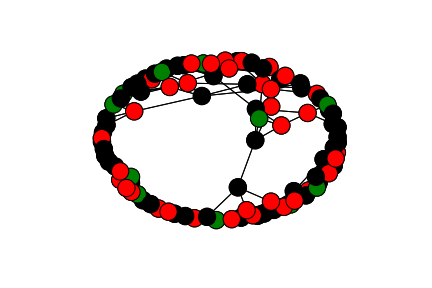
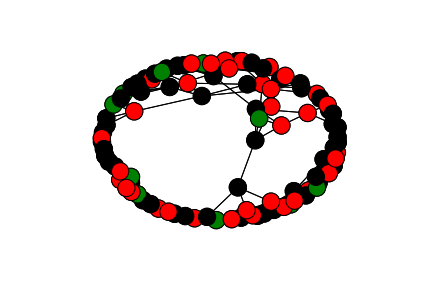
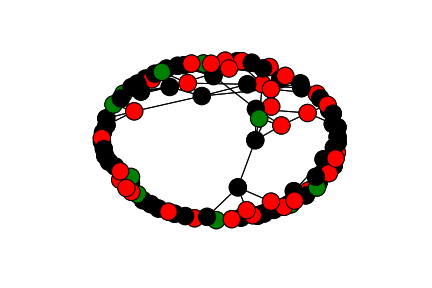
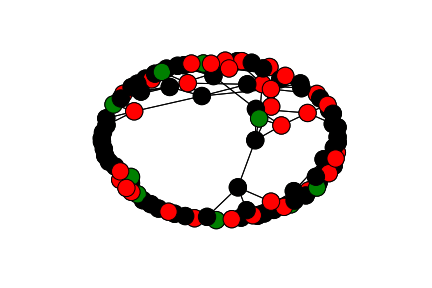
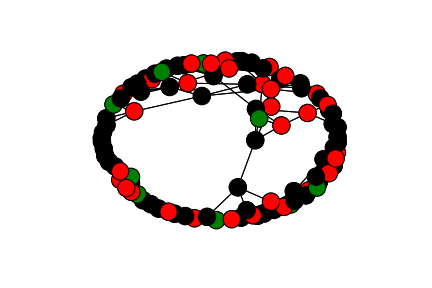
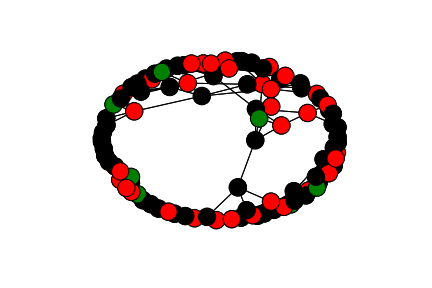
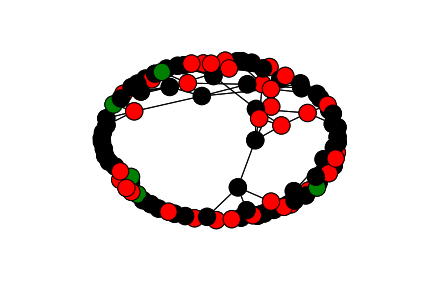
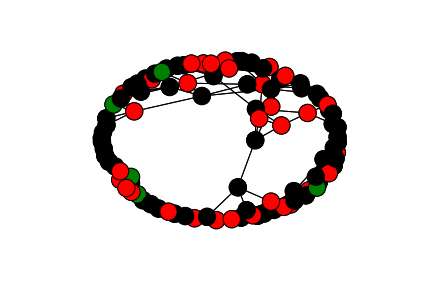
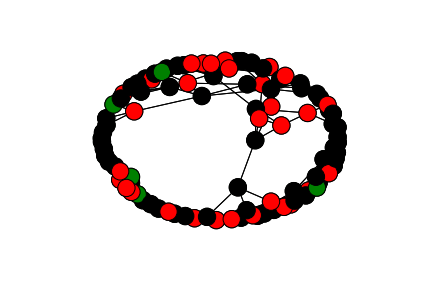
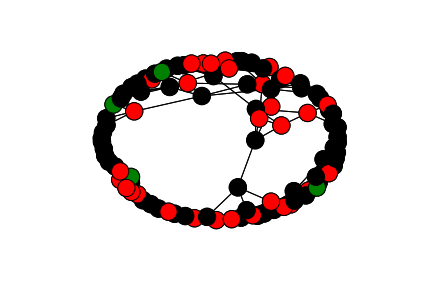
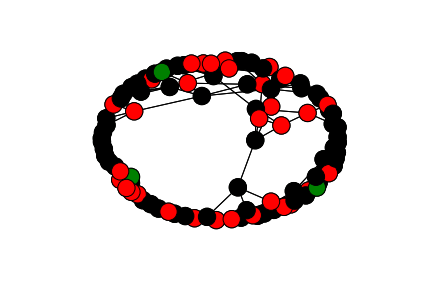
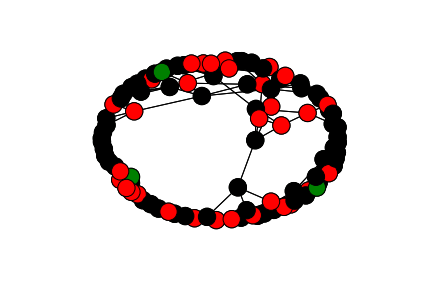
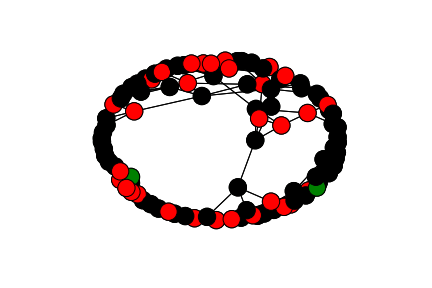
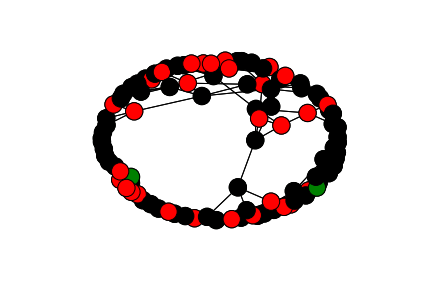
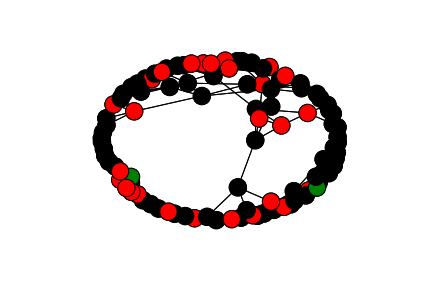
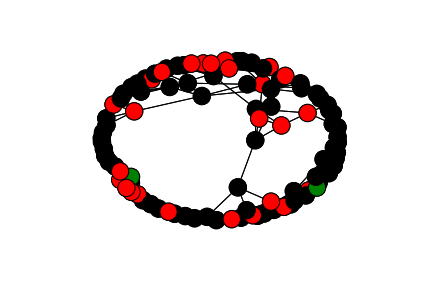
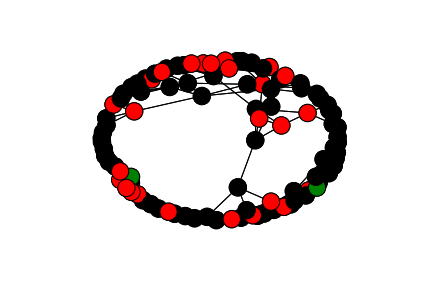
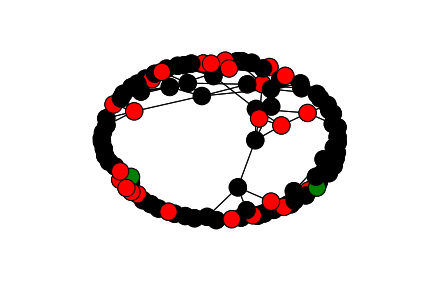
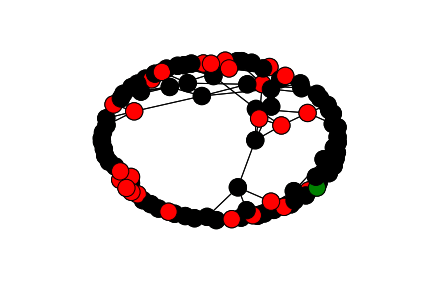
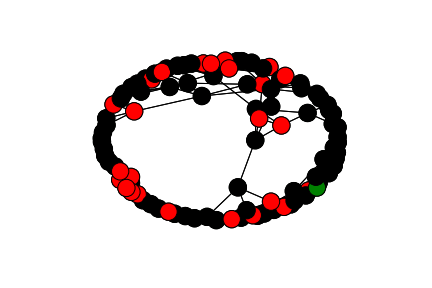
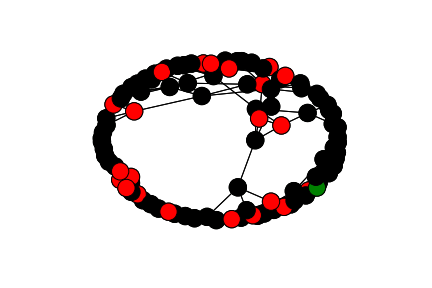
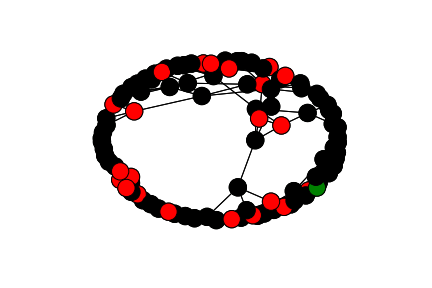
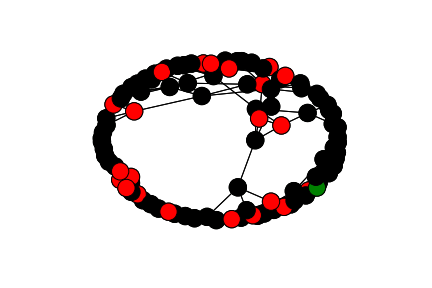
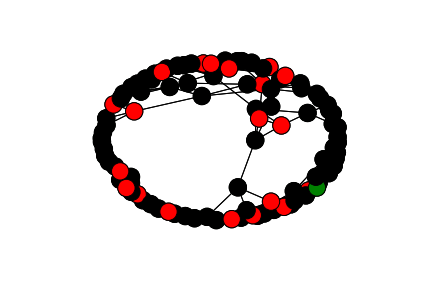
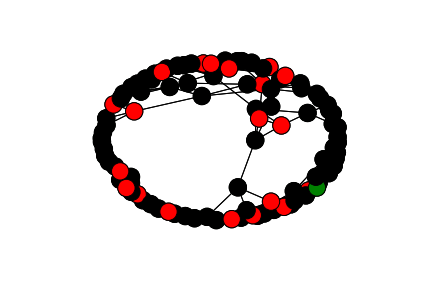
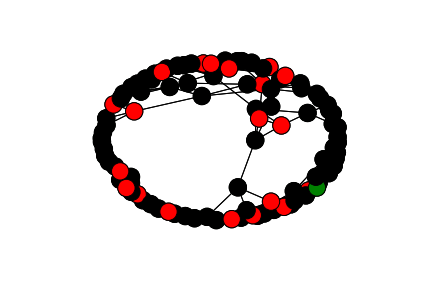
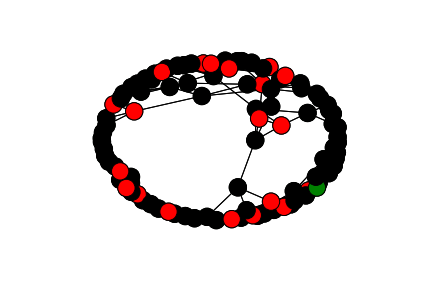
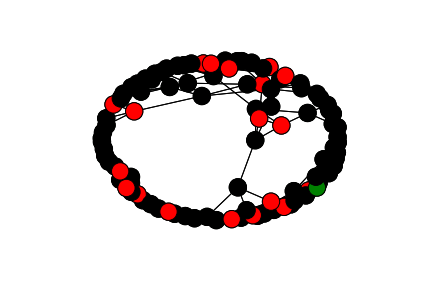
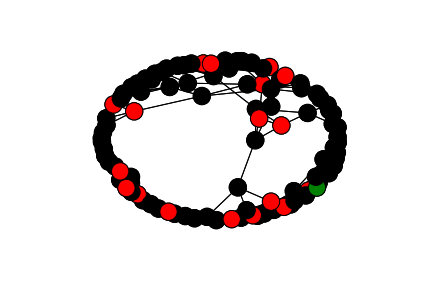
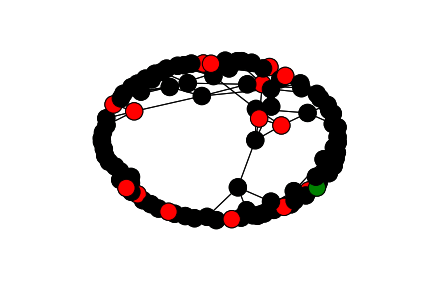
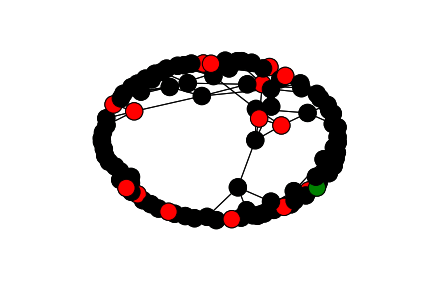
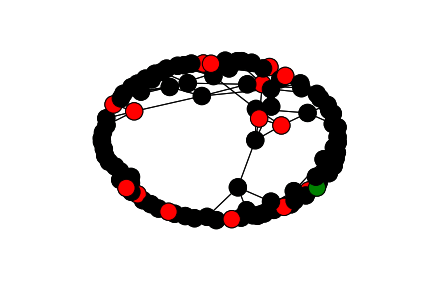
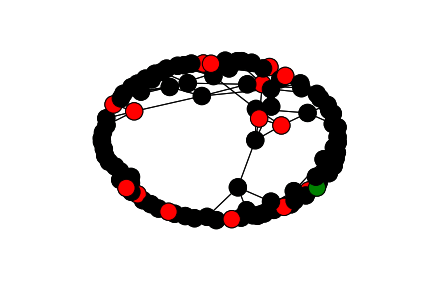
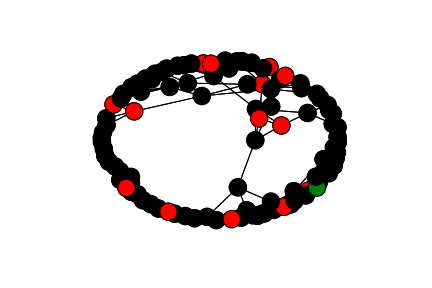
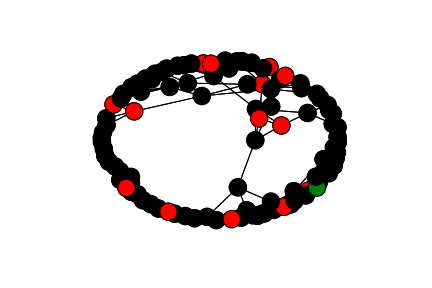
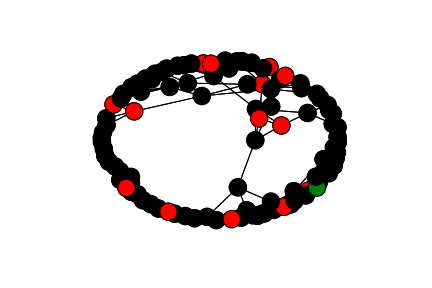
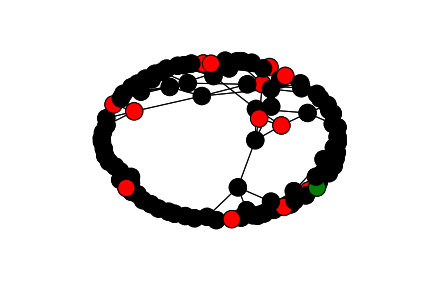
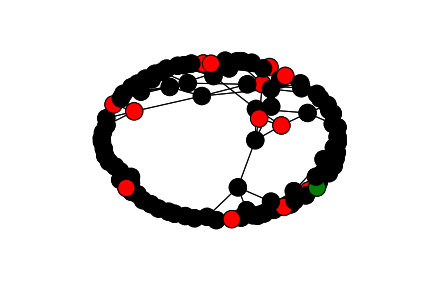
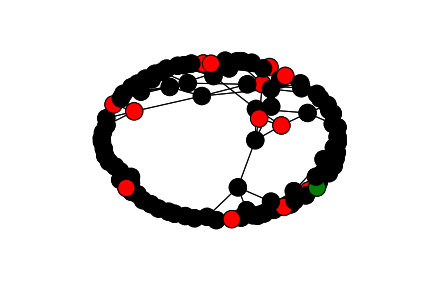
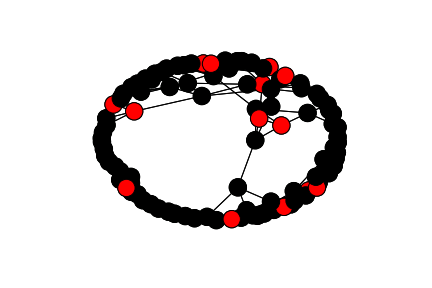
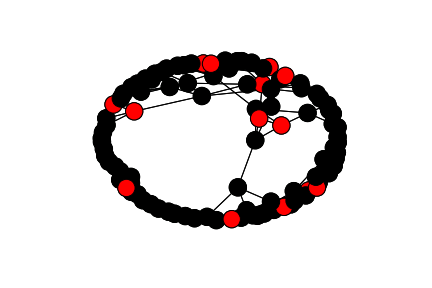
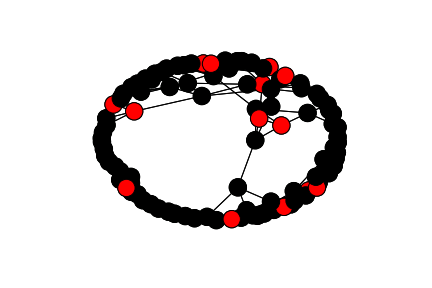
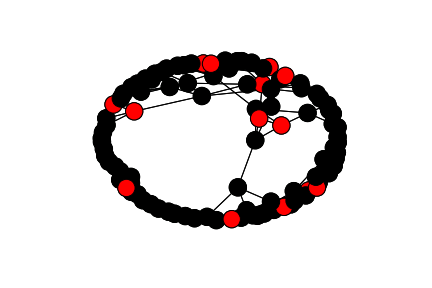
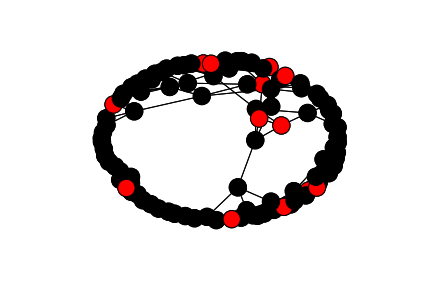
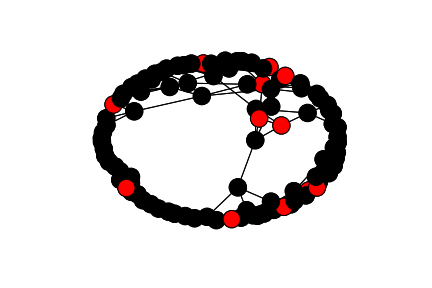
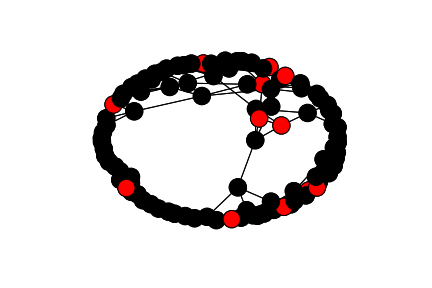
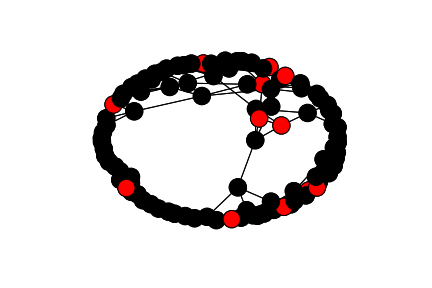
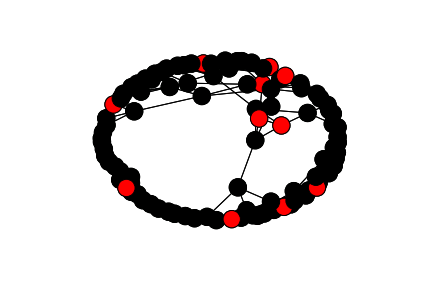
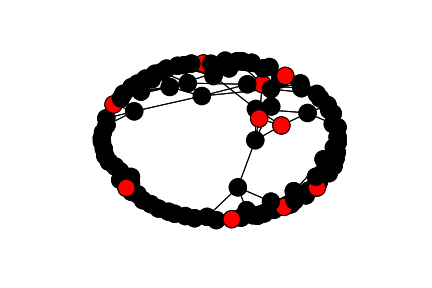
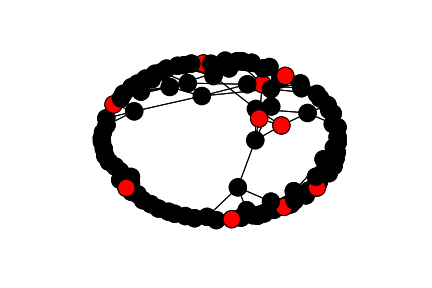
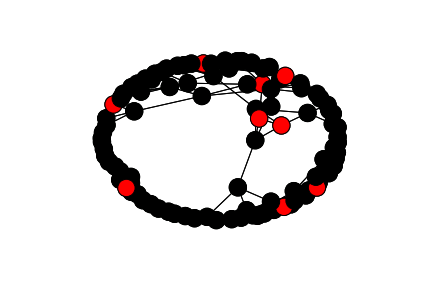
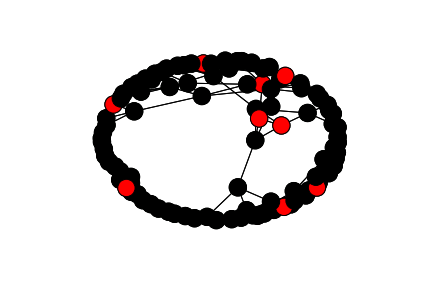
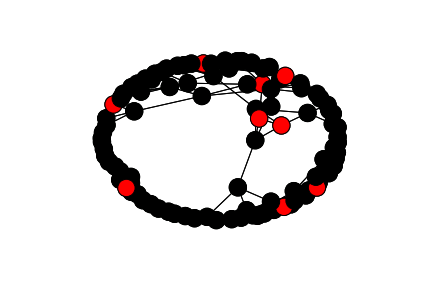
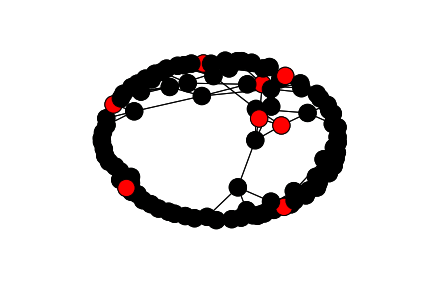
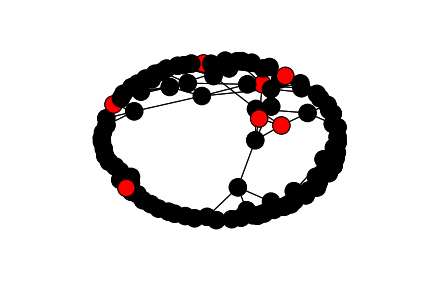
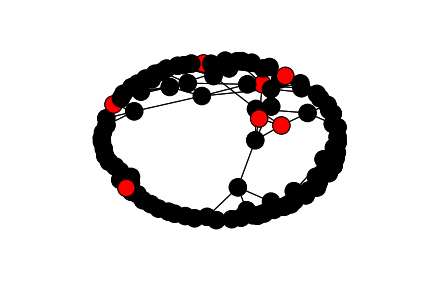
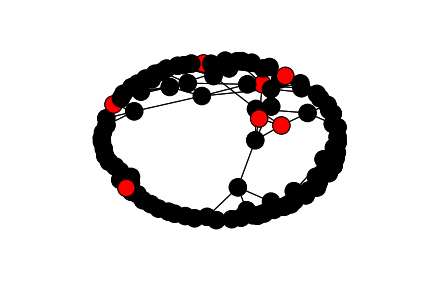
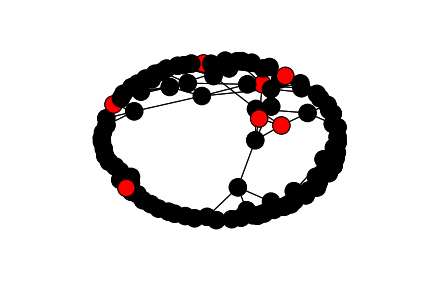
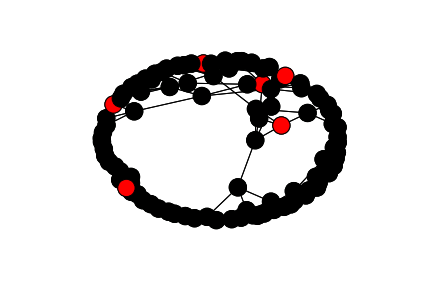
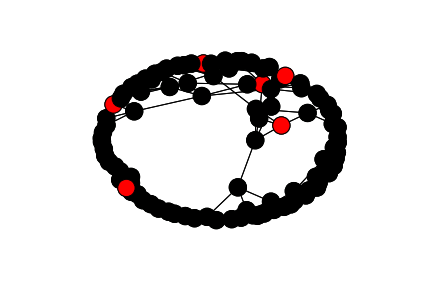
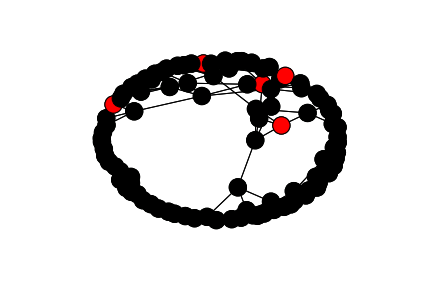
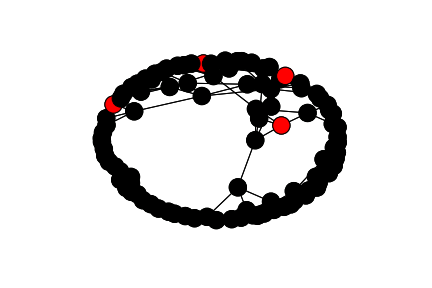
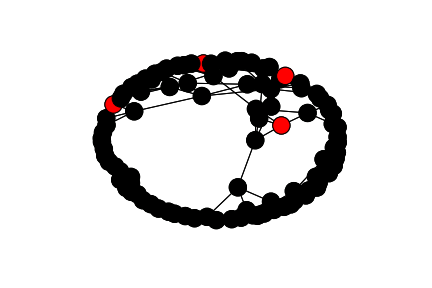
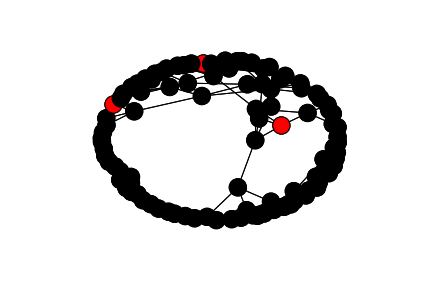
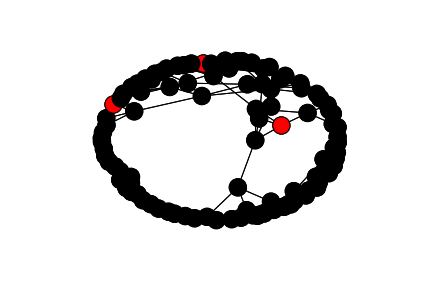
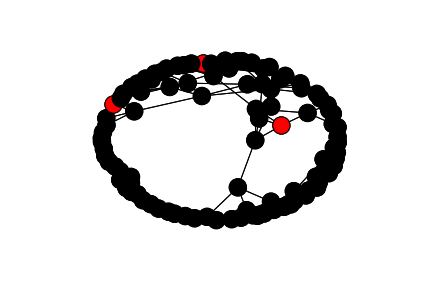
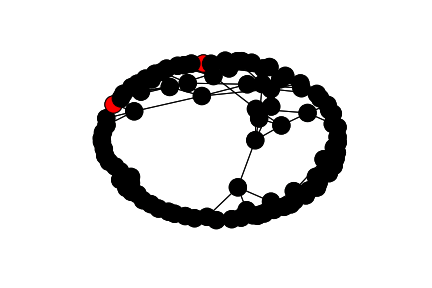
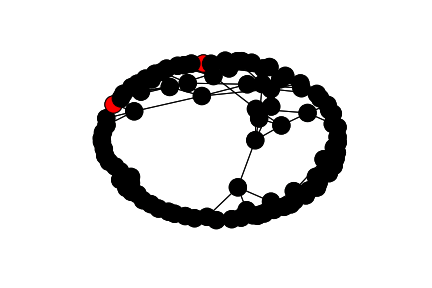
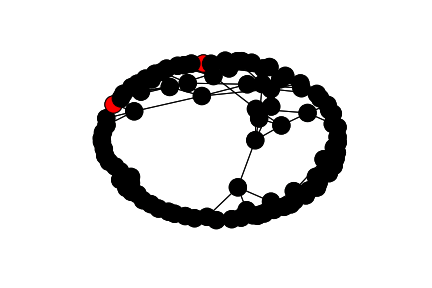
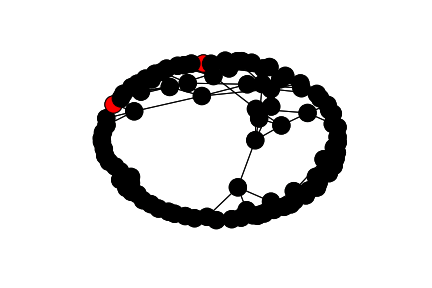
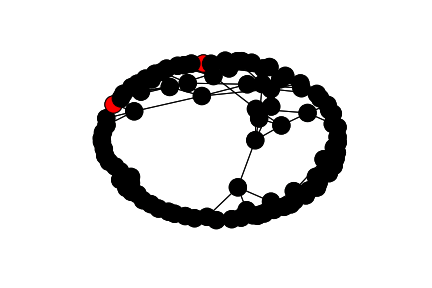
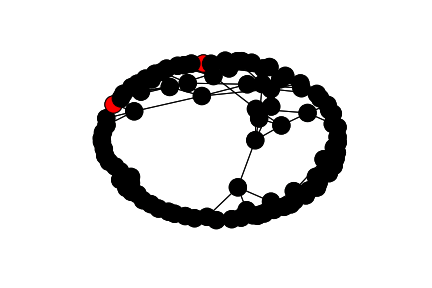
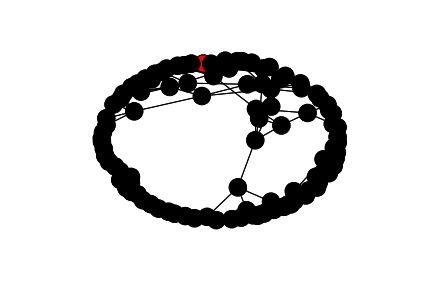
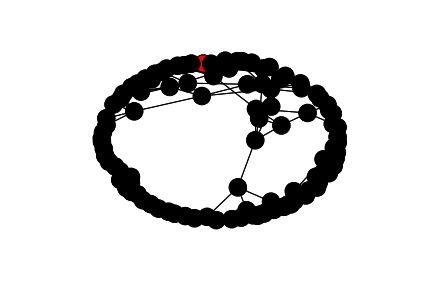
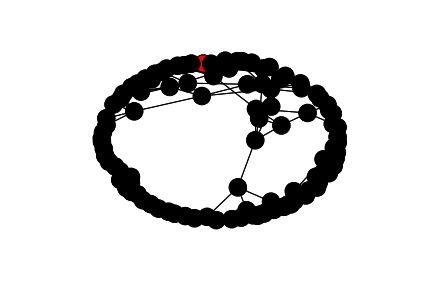
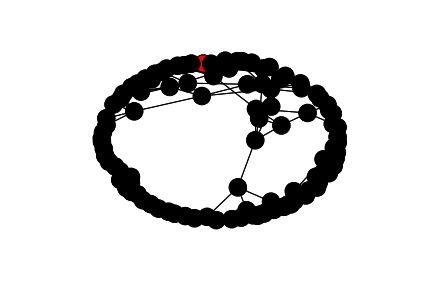
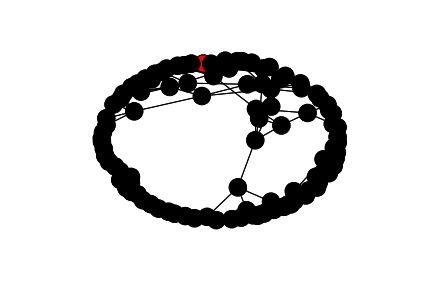
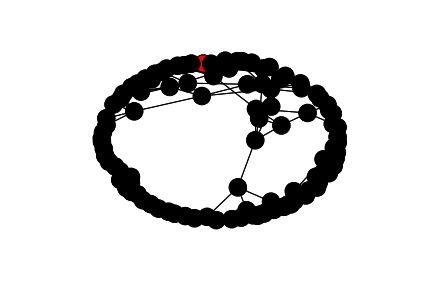
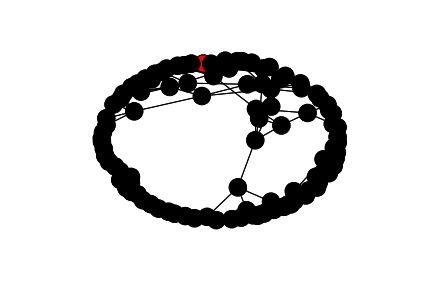
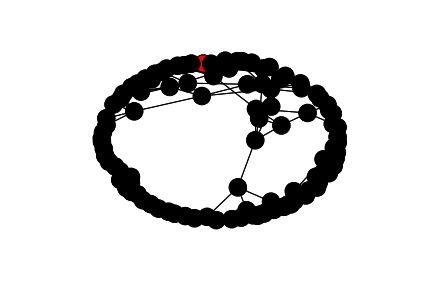
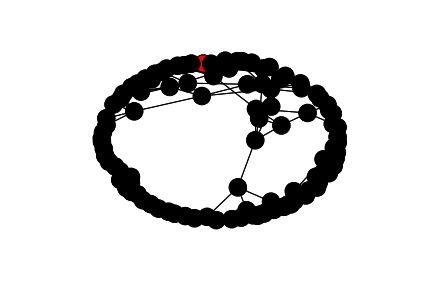
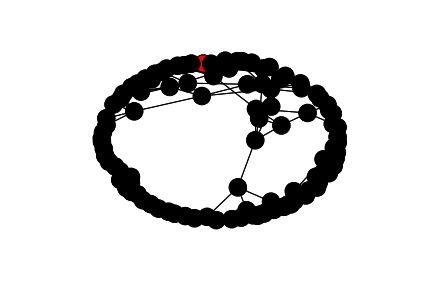
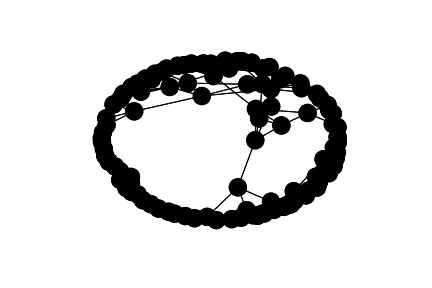
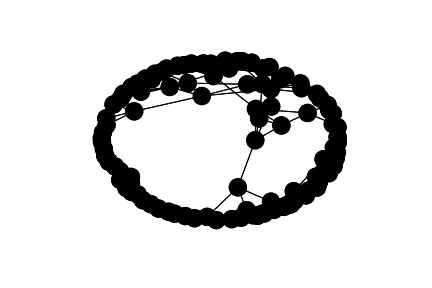
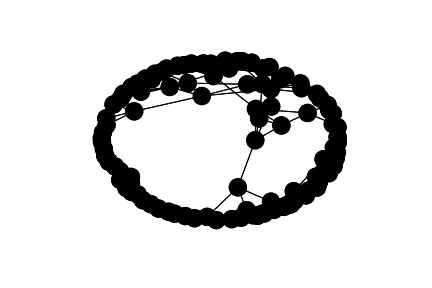
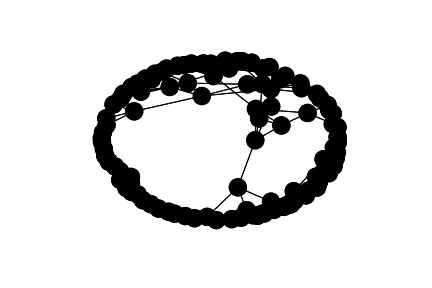
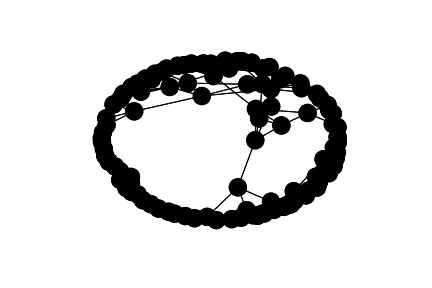
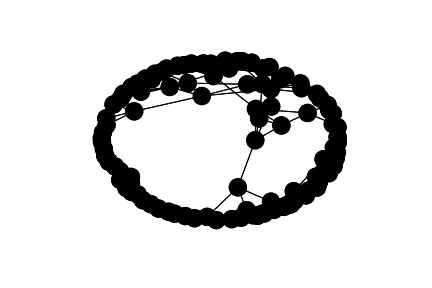
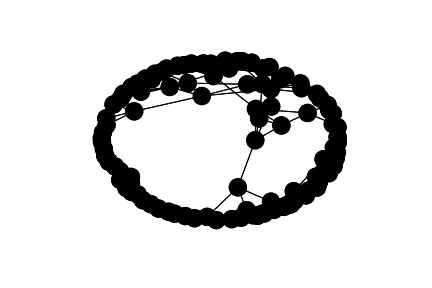
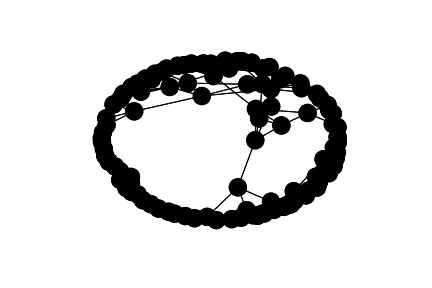
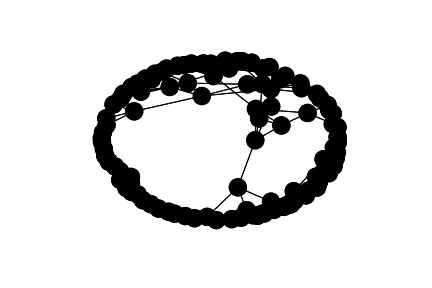
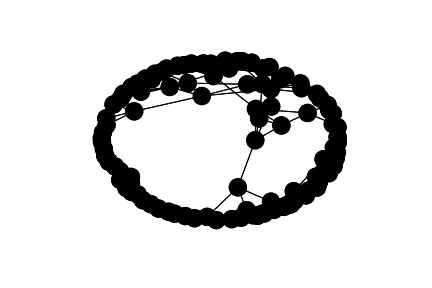
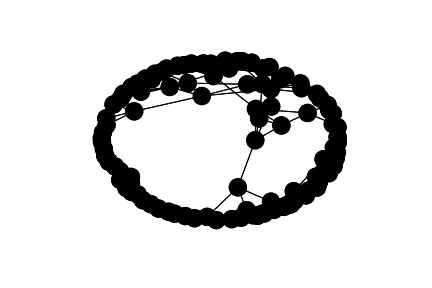
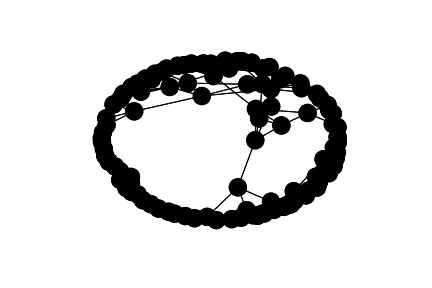
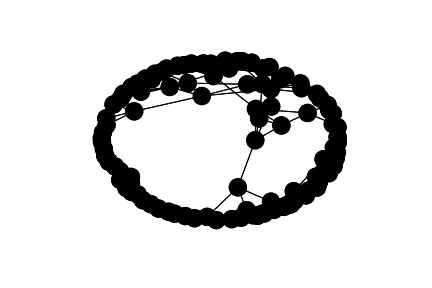
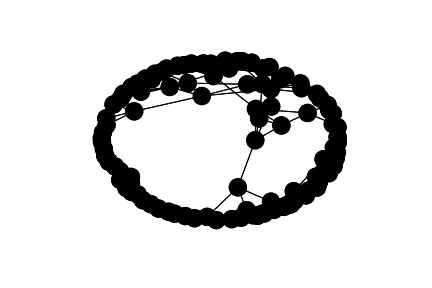
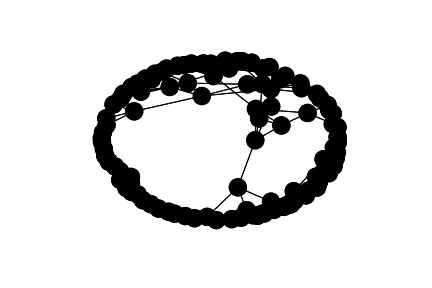
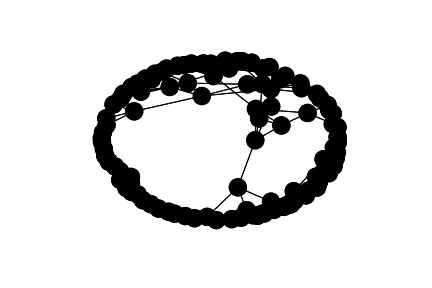
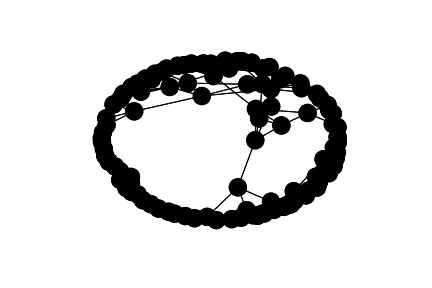
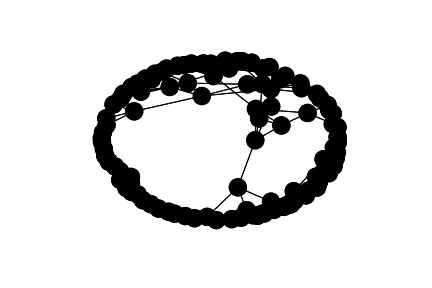
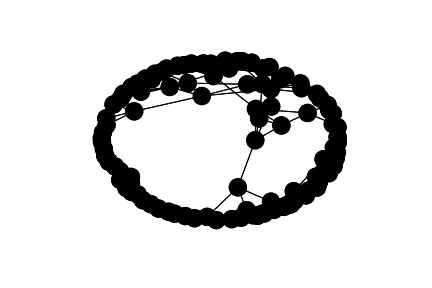
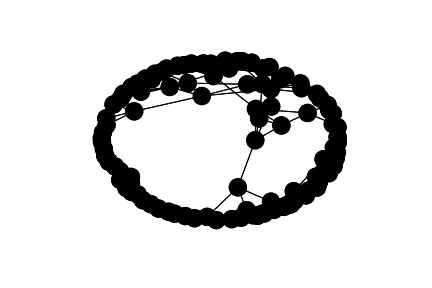
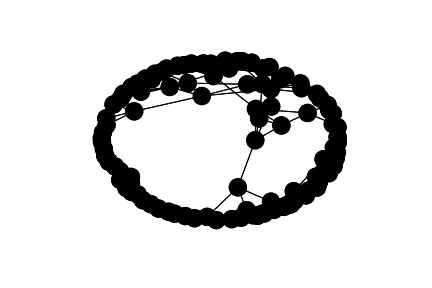
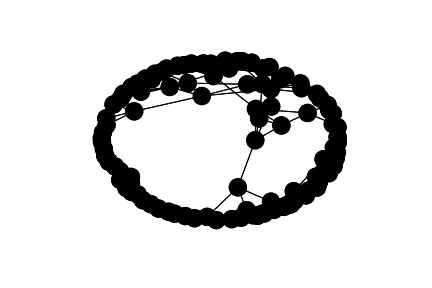
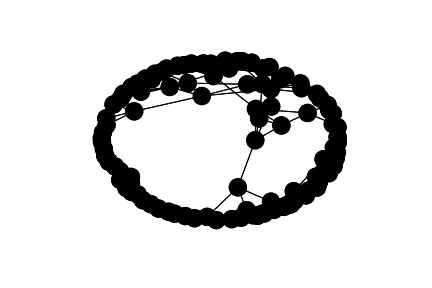
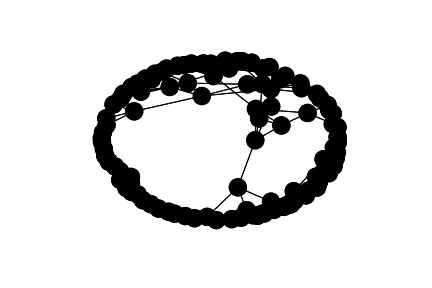
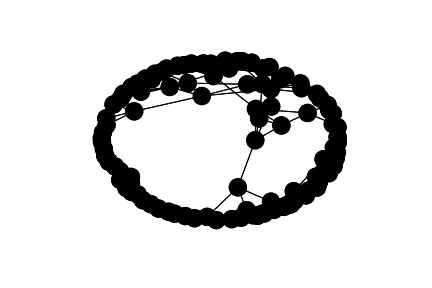
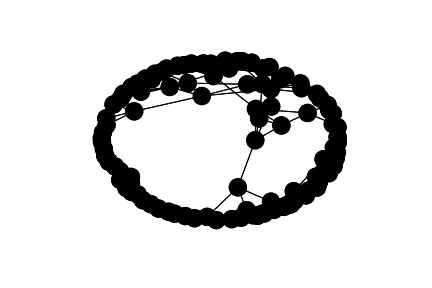
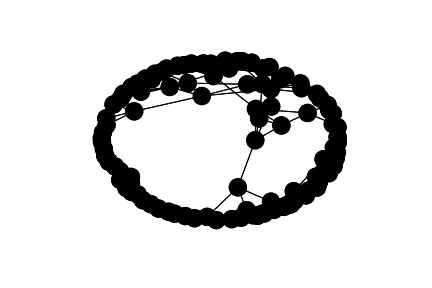
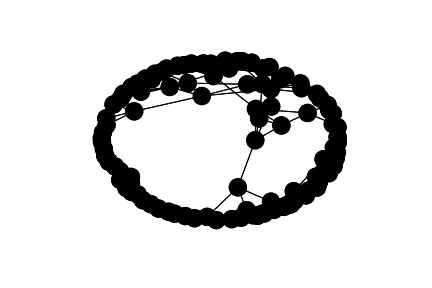
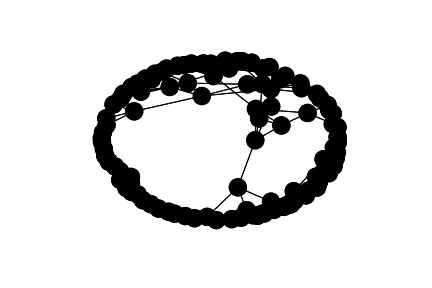
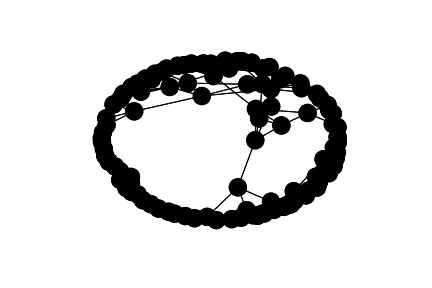
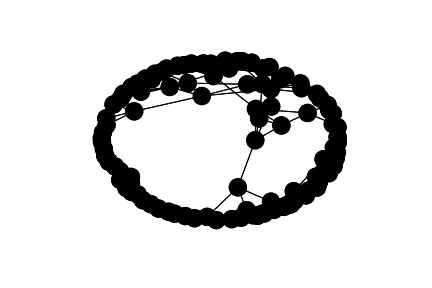
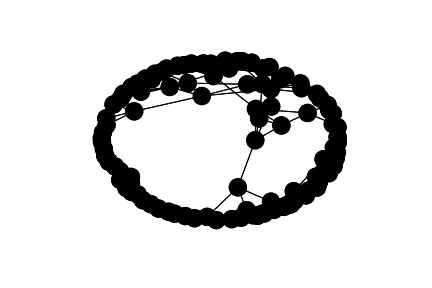
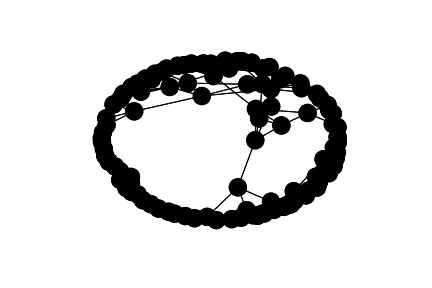
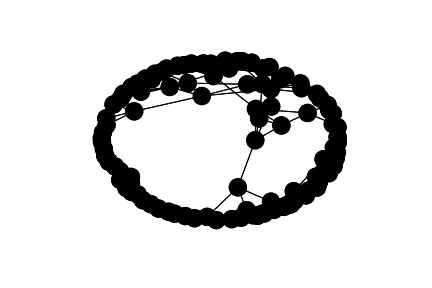
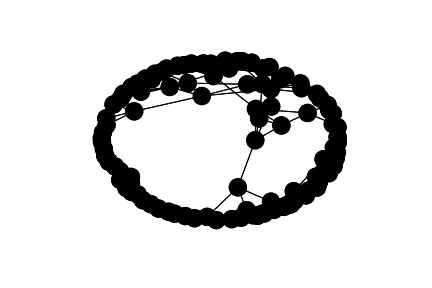
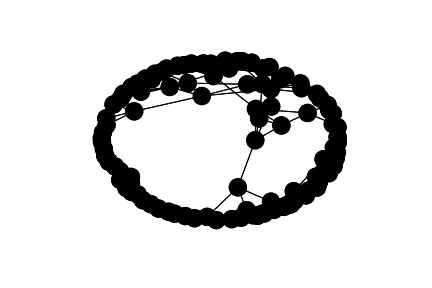
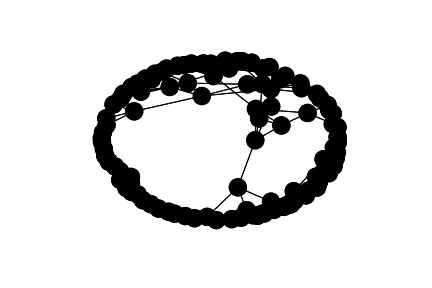
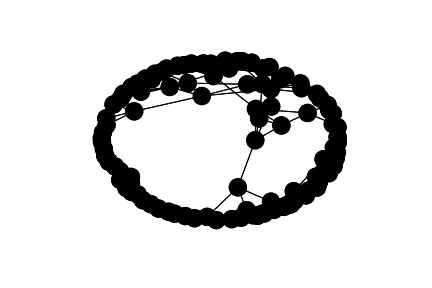
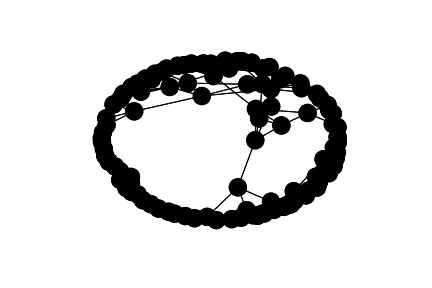
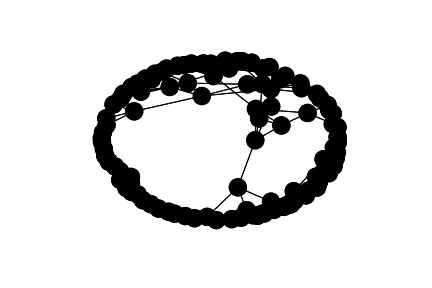
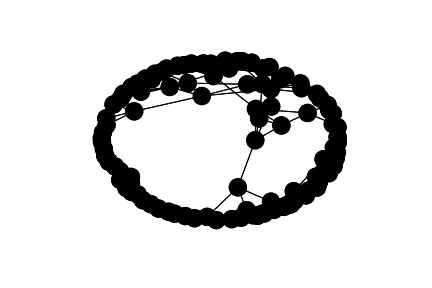
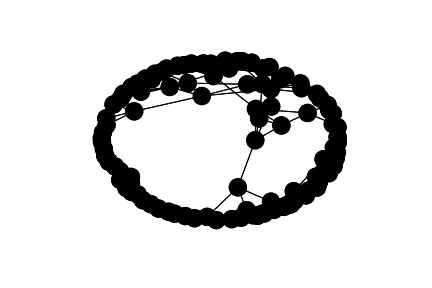
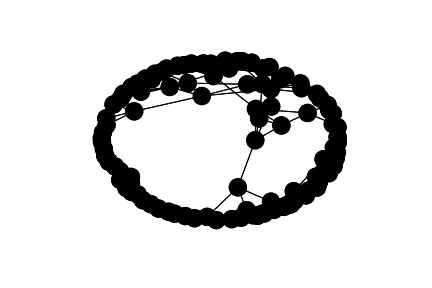
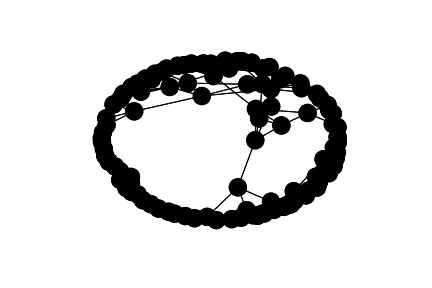
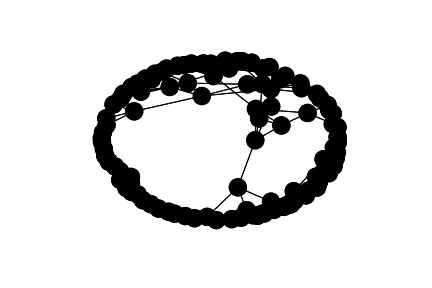
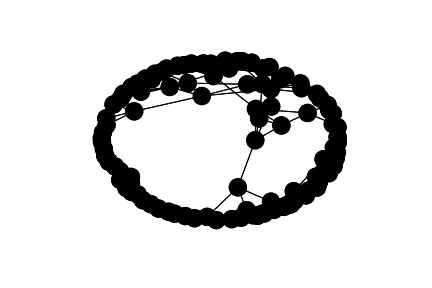

In [22]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax = plt.axes()
pos = nx.spring_layout(sir_model.network.graph)
colors = list(map(lambda x: cmap[x.state], sir_model.network.graph.nodes()))
nx.draw(sir_model.network.graph,pos=pos,ax=ax,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))
nodes = nx.draw_networkx_nodes(sir_model.network.graph,pos=pos,ax=ax,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))
nx.draw_networkx_edges(sir_model.network.graph,pos=pos,ax=ax,node_color=colors,cmap=plt.cm.get_cmap("Dark2"))

def animate(i):
    sir_model.step()
    colors = list(map(lambda x: cmap[x.state], sir_model.network.graph.nodes()))  
    nodes.set_facecolor(colors)
    return nodes

animation.FuncAnimation(fig, animate, frames=150, interval=30)

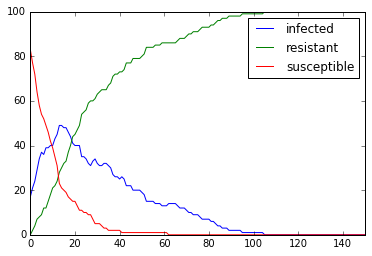

In [23]:
sir_model.run_model()
results = sir_model.dc.get_model_vars_dataframe()
results.plot()